In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/MyDrive/Classroom/BME-Lab-513-Training/Ses-2"

/content/gdrive/MyDrive/Classroom/BME-Lab-513-Training/Ses-2


In [27]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_json('../acctress.json')
df.head()

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都


### Check Overall of data

In [5]:
print(f'Number of features (columns): {df.shape[1]}')
print(f'Number of samples (rows): {df.shape[0]}')

Number of features (columns): 12
Number of samples (rows): 11186


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11186 non-null  int64  
 1   name         11186 non-null  object 
 2   japanName    11186 non-null  object 
 3   hiragana     11186 non-null  object 
 4   bust         6456 non-null   float64
 5   waist        6436 non-null   float64
 6   hip          6428 non-null   float64
 7   height       5012 non-null   float64
 8   birthday     4031 non-null   object 
 9   blood_type   3171 non-null   object 
 10  hobby        3730 non-null   object 
 11  prefectures  4471 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.0+ MB


Problems:

1.Quá nhiều dữ liệu bị null 
+ remove (rows--> bỏ sample) (cols --> bỏ feature)
+ fill(*)

+ feature engineering 

--> create new features

Tạo thêm thuộc tính độ tuổi (age)

In [7]:
# convert birthday to datetime object
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
df['birthday'] = pd.to_datetime(df['birthday'], yearfirst = True)

In [44]:
df['age'] = 2021 - pd.DatetimeIndex(df['birthday']).year

In [9]:
df.head()

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,age
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None,41.0
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都,43.0
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県,39.0
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都,38.0
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都,51.0


In [10]:
df.describe()

,id,bust,waist,hip,height,age
count,1.118600e+04,6456.000000,6436.000000,6428.000000,5012.000000,4031.000000
mean,4.852872e+05,87.094253,58.898229,86.289203,158.713148,36.704788
std,5.076289e+05,6.155405,3.176163,3.829804,5.814022,7.262923
min,3.000000e+00,51.000000,48.000000,54.000000,134.000000,20.000000
25%,7.189000e+03,83.000000,58.000000,84.000000,155.000000,32.000000
50%,2.678500e+04,86.000000,58.000000,86.000000,158.000000,36.000000
75%,1.026770e+06,90.000000,60.000000,88.000000,163.000000,41.000000
max,1.063061e+06,153.000000,100.000000,125.000000,182.000000,66.000000


+ Tìm xem Idol trẻ tuổi nhất

In [11]:
df[df['age'] == df['age'].min()]

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,age
9826,1059504,Maki Izuna,槙いずな,まきいずな,80.0,55.0,84.0,148.0,2001-01-27,None,読書,東京都,20.0
9933,1061822,Takeda Erena,武田エレナ,たけだえれな,NaN,NaN,NaN,NaN,2001-08-08,None,None,静岡県,20.0


+ Takeda Erena

+ 

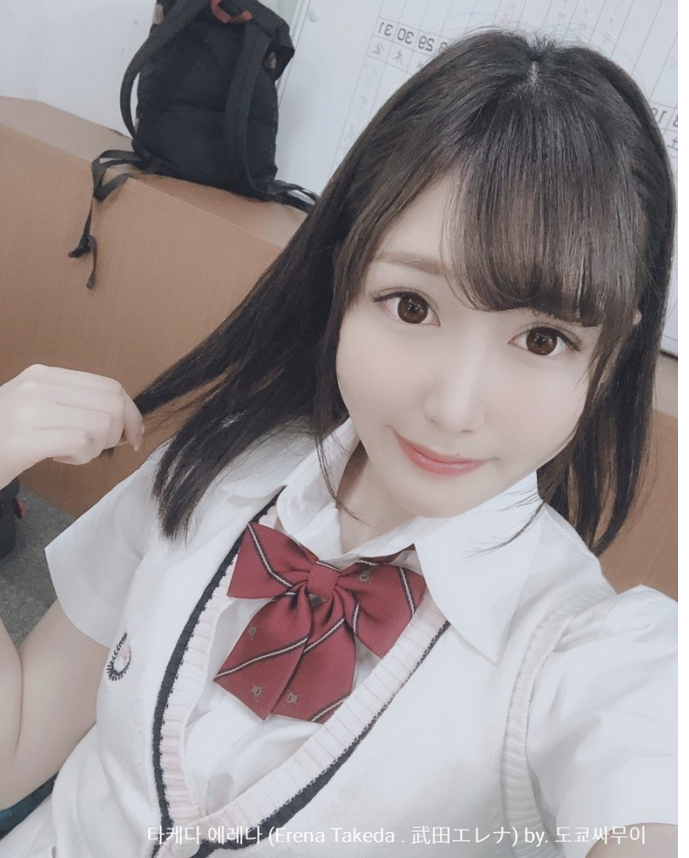

+ tìm idol có vòng 1 to nhất

In [12]:
df[df['bust'] == df['bust'].min()]

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,age
8225,1037623,Minagawa Erena,皆川エレナ,みながわえれな,51.0,84.0,NaN,156.0,NaT,None,None,None,NaN


+ ai thích thì search google thử đi nghen :> nhớ để tag ẩn danh.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11186 entries, 0 to 11185
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           11186 non-null  int64         
 1   name         11186 non-null  object        
 2   japanName    11186 non-null  object        
 3   hiragana     11186 non-null  object        
 4   bust         6456 non-null   float64       
 5   waist        6436 non-null   float64       
 6   hip          6428 non-null   float64       
 7   height       5012 non-null   float64       
 8   birthday     4031 non-null   datetime64[ns]
 9   blood_type   3171 non-null   object        
 10  hobby        3730 non-null   object        
 11  prefectures  4471 non-null   object        
 12  age          4031 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 1.1+ MB


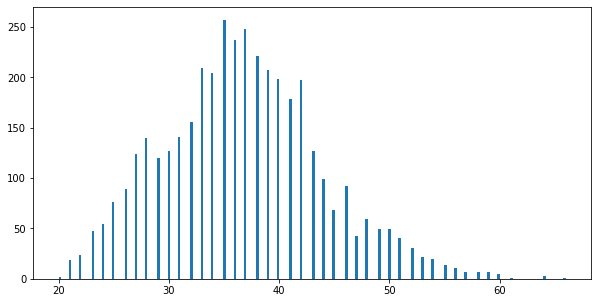

In [20]:
plt.figure(figsize = (10,5))
plt.hist(df['age'], bins = 200)
plt.show()

In [23]:
df['age'].values

array([41., 43., 39., ..., nan, nan, 37.])

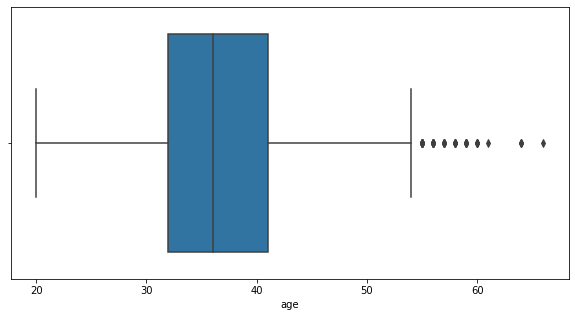

In [29]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = df['age'])
plt.show()

+ nhìn nhanh ta thấy ngoài 55 tuổi có thể là outlier 

Nhưng để tìm chính xác hơn ta sử dụng công thức 
Interquartile Range (IQR)

In [30]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

In [34]:
min_value = Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR

print(f'min_value = {min_value}')
print(f'max_value = {max_value}')

min_value = 18.5
max_value = 54.5


In [39]:
min_outlier = (df['age'] < min_value).astype(int).sum()
max_outlier = (df['age'] > max_value).astype(int).sum()

print(f'min_outlier = {min_outlier}')
print(f'max_outlier = {max_outlier}')

min_outlier = 0
max_outlier = 56


có 0 người dưới 18 tuổi và có 56 người từ 55 tuổi trở lên (thật là yêu nghề :> )

In [41]:
median_age = df['age'].median()
print(f'median_age = {median_age}')

median_age = 36.0


+ if we fill nan in age equal to meadian age (36)

In [42]:
df['age'] = df['age'].fillna(median_age)

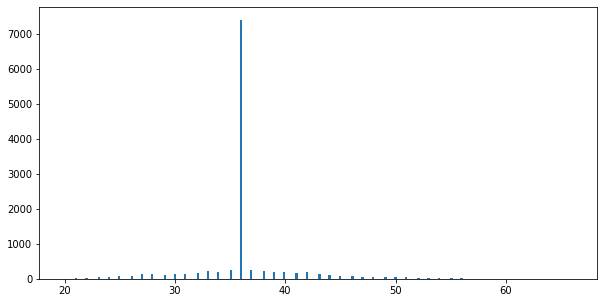

In [43]:
plt.figure(figsize = (10,5))
plt.hist(df['age'], bins = 200)
plt.show()

+ thấy không ổn dòi 

+ điền các giá trị nan với kiểu phân phối chuẩn 
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [75]:
# reset value 
df['age'] = 2021 - pd.DatetimeIndex(df['birthday']).year

In [79]:
# remove outlier to calculate mean an std
mean = int(df[df['age'] < max_outlier]['age'].mean())
std = int(df[df['age'] < max_outlier]['age'].std())

print(f'mean = {mean}')
print(f'std = {std}')

mean = 36
std = 6


In [80]:
gaussian = np.random.normal(loc = mean, scale = std, size = (len(index))).astype(int)

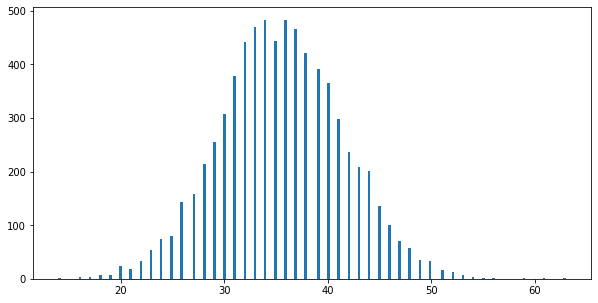

In [81]:
plt.figure(figsize = (10,5))
plt.hist(gaussian, bins = 200)
plt.show()

In [82]:
for i in range(len(index)):
  df['age'][index[i]] = gaussian[i]

In [83]:
df['age'].isnull().sum()

0

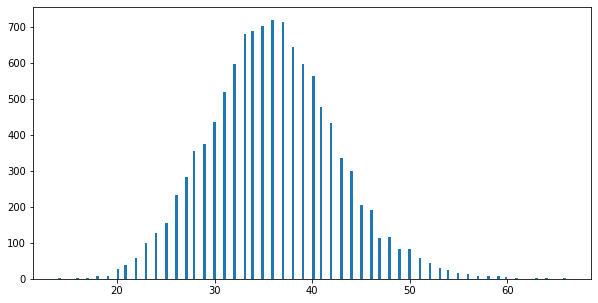

In [84]:
plt.figure(figsize = (10,5))
plt.hist(df['age'], bins = 200)
plt.show()

### Tìm Idol theo tên

In [91]:
df[df['name'].str.contains('Maria')]

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,age
300,11714,Hayasi Maria,林マリア,はやしまりあ,103.0,60.0,92.0,155.0,1984-01-15,A,映画鑑賞,東京都,37.0
382,11987,Maria Sara,マリアサラ,まりあさら,NaN,NaN,NaN,NaN,NaT,None,None,None,44.0
602,12889,Asai Maria,浅井マリア,あさいまりあ,NaN,NaN,NaN,NaN,NaT,None,None,None,44.0
697,13736,Hiziri Maria,聖まりあ,ひじりまりあ,88.0,58.0,86.0,148.0,1985-12-24,A,ショッピング、フィギュアスケート,北海道,36.0
776,13994,Ogura Maria,小椋まりあ,おぐらまりあ,90.0,58.0,86.0,NaN,1984-01-01,None,None,None,37.0
835,14485,Aoyama Maria,青山まりあ,あおやままりあ,76.0,55.0,85.0,145.0,1985-12-19,O,None,千葉県,36.0
935,14864,Tamaki Maria,玉置マリア,たまきまりあ,NaN,NaN,NaN,NaN,1970-10-15,None,None,None,51.0
968,15187,Ozawa Maria,小澤マリア,おざわまりあ,88.0,58.0,86.0,162.0,1986-01-08,A,ギター,北海道,35.0
1473,1821,Nisimura Maria,西村まりあ,にしむらまりあ,NaN,NaN,NaN,NaN,NaT,None,None,None,32.0
1658,1918,Sendou Maria,千堂マリア,せんどうまりあ,88.0,60.0,80.0,NaN,NaT,None,None,None,48.0


### Nghiên cứu sở thích của các idol

In [127]:
from wordcloud import WordCloud, ImageColorGenerator

In [94]:
hobby = df[df['hobby'].notnull()]

In [95]:
hobby.head()

,id,name,japanName,hiragana,bust,waist,hip,height,birthday,blood_type,hobby,prefectures,age
0,3,Kitagawa Yui,北川ゆい,きたがわゆい,95.0,60.0,88.0,NaN,1980-12-14,AB,クラシックバレエ,None,41.0
1,4,Akira,Akira,あきら,90.0,58.0,86.0,157.0,1978-08-15,A,水泳、ゴルフ,東京都,43.0
2,6,Cocolo,COCOLO,こころ,96.0,55.0,85.0,168.0,1982-07-07,B,パソコン,茨城県,39.0
3,8,Saiko,Saiko,さいこ,80.0,59.0,82.0,162.0,1983-04-12,O,料理、大食い,東京都,38.0
4,11,Aida Momo,あいだもも,あいだもも,82.0,55.0,89.0,162.0,1970-06-18,A,エアロビクス,東京都,51.0


In [98]:
# đưa tất cả các hobby về cùng 1 string 
hobby_str = "".join(hobby['hobby'])

In [99]:
hobby_str

'クラシックバレエ水泳、ゴルフパソコン料理、大食いエアロビクスゲームスキューバダイビング、パソコン、衣装デザイン料理、パソコンショッピング旅行、読書おひるね、散歩、料理ショッピング、スポーツ観戦カラオケ水泳ショッピング、料理ショッピングショッピング、バスケ、フットサル、料理読書、映画鑑賞社交ダンススポーツ全般、書道5段ショッピング、ゲーム映画鑑賞、ショッピング、ドライブ、パソコンスポーツ全般水泳、ダンスネイルアート映画鑑賞、ライブ鑑賞音楽鑑賞、カラオケ、スノーボード音楽鑑賞洗濯旅行パチンコスポーツ観戦ゲーム読書寝ることショッピングドライブ、スキー、フィッシングドライブ、カラオケ料理ダイビングゴルフカラオケ読書音楽鑑賞各国別ダンス、ものまね映画鑑賞ピアノ、エアロビ、テニスバスケットボールモトクロスショッピングショッピング、ダンス、ピアノ読書、映画鑑賞、ピアノ、フルート映画鑑賞テニス、バイオリン、フランス語カラオケ、料理読書、お酒、ＳＭ買い物読書、美術館巡り、フェラ、パイズリチアリーダー、ピアノお菓子作り、ネイルアートパソコンパソコンフェンシングエステ、旅行音楽鑑賞ショッピングプリクラ、カラオケ、ブリッジ、ピアノダンス、新体操映画鑑賞読書、コスプレ、ニーソ集め、おもちゃ屋さんに行くショッピング、カラオケボーリング、カラオケ、華道、ゴルフ、テニスお菓子作り、バレーボールショッピングドライブ散歩、ショッピング、水泳、卓球ピアノビリヤードバレエ、英会話音楽鑑賞歌・ピアノ・エレクトーン・作曲・格闘技観戦・旅行・天体観測・ガーデニングカラオケ、ピアノ、水泳買い物、おしゃべりネイルアート、新体操、バスケットお菓子作り、プーさん集めスノーボード、ウェイクボードカラオケ、マッサージ散歩、料理、バスケウォーキング、ショッピング、ピアノ、料理ショッピング、料理、飴玉の反復横跳び家で犬とゴロゴロカラオケ、映画鑑賞、ピアノ買い物、テニスお買い物、自己投資お酒、カラオケ、ピアノ、書道、早起きパソコン、ネットゲーム音楽鑑賞、カラオケ、ビリヤードショッピングカラオケ、水泳買い物歌、笑顔美容、マッサージショッピング、料理ダンス、インターネット、蚊取り、料理犬の散歩、ピアノ買い物、ものづくり旅行ショッピング、カラオケ、ピアノ、バレーボールショッピング映画鑑賞、料理読書、音楽鑑賞テニス、ピアノ、ショッピン

In [102]:
wordcloud  =WordCloud(font_path = 'jp.otf', max_words = 100, max_font_size = 30)

In [104]:
hobby_wc = wordcloud.generate(hobby_str)

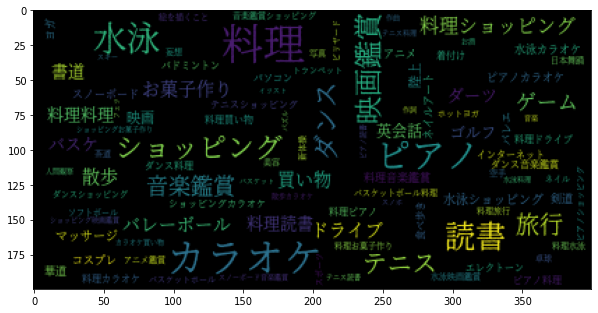

In [107]:
plt.figure(figsize = (10, 10))
plt.imshow(hobby_wc)
plt.show()

In [108]:
!ls

 acctress.json	 jp.otf
 Jisoo.png	'Tìm hiểu văn hóa nước Nhật (Dự án về giáo dục).ipynb'


In [122]:
import cv2
from PIL import Image

In [152]:

mask_color = np.array(Image.open('../mask.png'))
mask_black = np.array(Image.open('../mask_black.png'))

In [170]:
wordcloud  = WordCloud(font_path = '../jp.otf', max_words = 100, max_font_size = 30, mask = mask_black, background_color = 'black')

In [171]:
hobby_wc = wordcloud.generate(hobby_str)

In [172]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 10

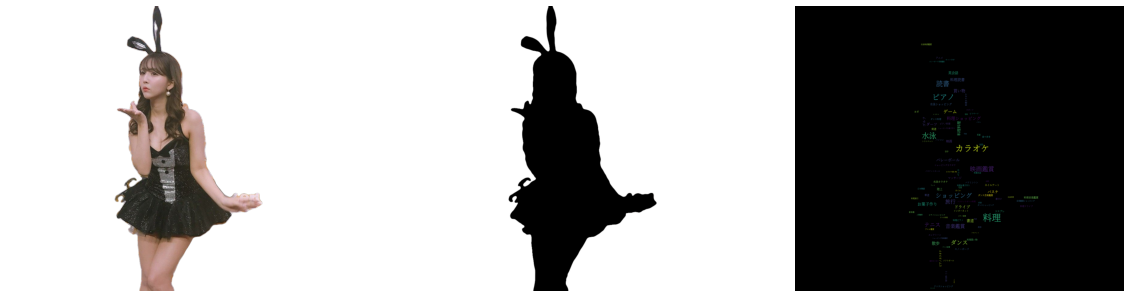

In [173]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(mask_color)
axes[1].imshow(mask_black)
axes[2].imshow(hobby_wc)
for ax in axes:
    ax.set_axis_off()
plt.show()

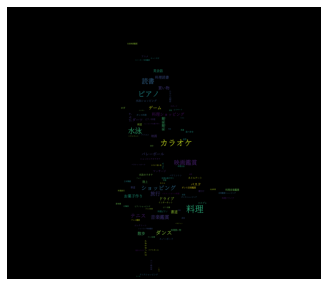

In [175]:
plt.figure(figsize=(10, 5))
plt.imshow(hobby_wc)
plt.axis('off')
plt.show()